# Clustering

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3EBF-0838

 Directory of C:\Users\abdul\Documents\MSAI\day5

01-06-2023  23:20    <DIR>          .
01-06-2023  23:20    <DIR>          ..
29-05-2023  21:43    <DIR>          .ipynb_checkpoints
01-06-2023  23:09           141,824 cars.xls
01-06-2023  23:20            12,698 Day5-Clustering.ipynb
               2 File(s)        154,522 bytes
               3 Dir(s)  140,355,489,792 bytes free


In [3]:
df=pd.read_excel('cars.xls')

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
x=df[['Price','Mileage','Cylinder']]

In [6]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
model=KMeans(4) #making into 4 clusters.

In [9]:
model=model.fit(x)

In [10]:
pred=model.predict(x)

In [11]:
x['Cluster']=pred

In [12]:
x.head()

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,3


In [13]:
silhouette_score(x,pred)

0.40999379881655523

In [14]:
import matplotlib.pyplot as plt

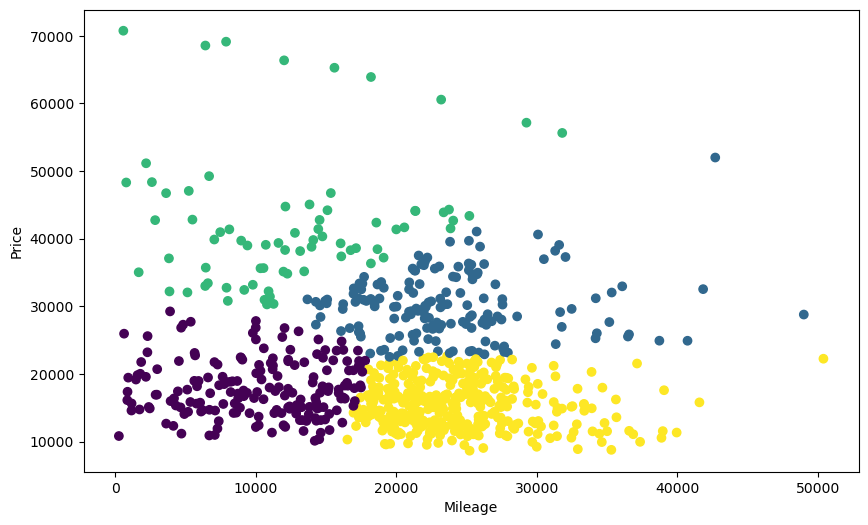

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=pred)
plt.xlabel('Mileage')
plt.ylabel('Price');

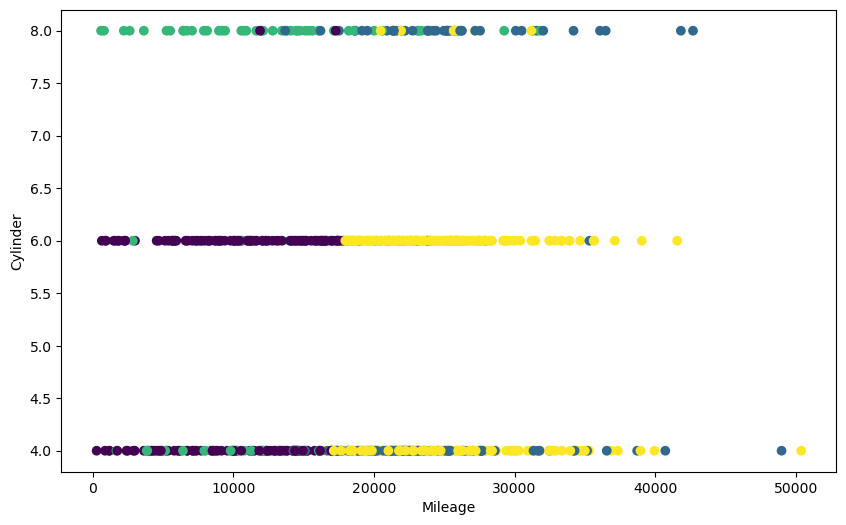

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Cylinder,c=pred)
plt.xlabel('Mileage')
plt.ylabel('Cylinder');

In [20]:
x=df[['Price','Mileage','Cylinder']]

In [23]:
allscore=[]
allcluster=[]
distances=[] #distance from centroid of the cluster ofdataset.
def clust(k):
    for i in range(1,k):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        distance=model.inertia_
        print('Cluster: ',i,',','score: ',score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [24]:
clust(10)

Cluster:  2 , score:  0.45170119051536717
Cluster:  3 , score:  0.4132108639216514
Cluster:  4 , score:  0.4134967476291178
Cluster:  5 , score:  0.3550640642212742
Cluster:  6 , score:  0.3606402710252942
Cluster:  7 , score:  0.357859760739274
Cluster:  8 , score:  0.36616939104712204
Cluster:  9 , score:  0.34997731592367765
Cluster:  10 , score:  0.35054049996058817


In [25]:
# the silhouette_score is decreasing , 4 is the optimum cluster,from which it wont change.

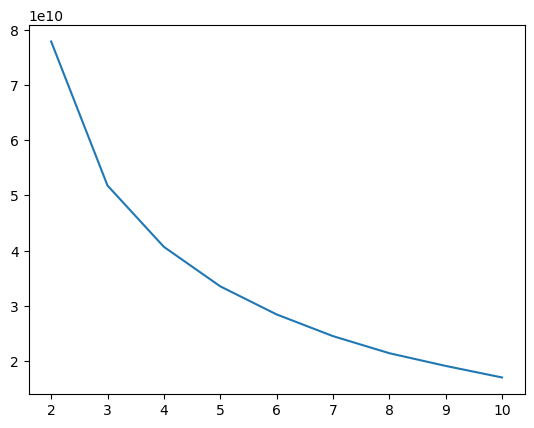

In [26]:
plt.plot(allcluster,distances) #elbow method

In [27]:
# in the above figure,itis clusters vs distance,we want an optimum point at which distance is minimal and also the less clusters maybe.
#so here elb0w brokes at 4,thus it is the optimum point or the cluster we need to choose.

In [29]:
#pip install yellowbrick

In [43]:
 # finding cluster using KElbowVisualizer.

In [30]:
from yellowbrick.cluster import KElbowVisualizer 

In [31]:
model=KMeans()

In [40]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

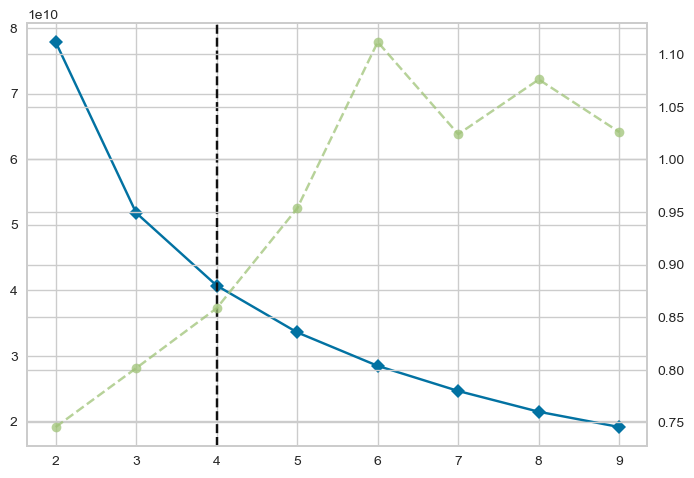

In [41]:
visualizer.fit(x)


In [42]:
visualizer.show()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [46]:
data=linkage(x,method='ward',metric='euclidean')

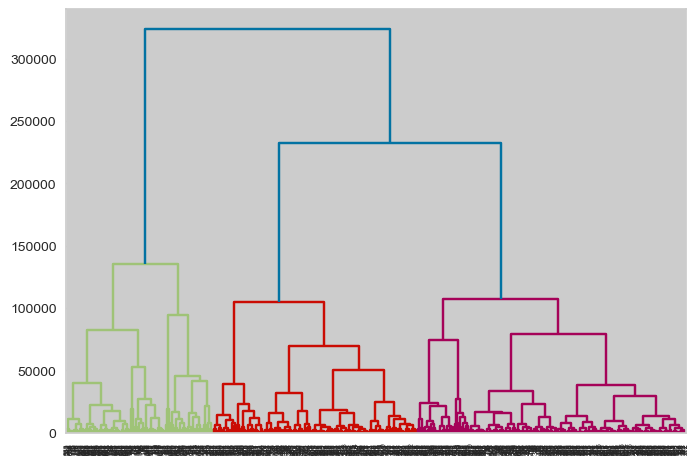

In [48]:
dendrogram(data)
plt.show()